# <center> Exposant de Hurst <center/>
---
---
> Le but ici est d'utiliser des réseaux de neurones pour l'estimation de l'exposant de Hurst. De comparer les réseaux ANN et CNN, et de se demander quelle architecture peut être la meilleure.

In [ ]:
!pip install fbm
# !pip install ann_visualizer # Pour visualiser les ANN (mais en pdf..)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbm import fbm
from tqdm.notebook import tqdm
from keras.layers import LeakyReLU
# from ann_visualizer.visualize import ann_viz
plt.style.use("ggplot")

In [ ]:
# Import de nos drive pour les fichiers
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# 1 - Réseaux denses (ANN)

Un ANN est un réseau de neurone artificiel, dense si il contient plus d'une couche cachée (DNN).

## 1) $X_{train}$

- On génère $10000$ série temporelles de longueur $T=100$ pour $10$ valeurs de $H \in [0,1]$.
  - On fait le choix de générer avec des $H_{min}$ et $H_{max}$ très proches de $0$ et de $1$ afin que notre modèle soit entrainé aux valeurs "extrêmes". En effet le test set sera composé de valeurs de $H \in [0.01, 0.99]$.

In [ ]:
# On créé notre matrice X_train
T = 100
M = 10000
X_train = np.zeros((M*10,T))
Hs = np.linspace(0.01,0.99,10)
for i in tqdm(range(10), desc="X_train"):
  for k in range(M):
    X_train[(i*M)+k,:] = fbm(T-1, Hs[i], length=1) # (10 000, 100)

/usr/local/lib/python3.6/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


## $Y_{train}$


In [ ]:
# On créé notre Y_train
Y_train = np.zeros([])
for k in range(len(Hs)):
  Y_train = np.vstack((Y_train, np.array([Hs[k]]*M).reshape((M,1))))
Y_train = Y_train[1:] # (10 000, 1)

## 2) $X_{test}$

- On génère $1000$ séries temporelles de longueur $T=100$ pour $100$ valeurs de $H \in [0.01,0.99]$. 

In [ ]:
# On créé notre matrice Xtest
T = 100
M = 1000
X_test = np.zeros((M*100,T))
Hs = np.linspace(0.01,0.99,100)
for i in tqdm(range(100), desc="X_test"):
  for k in range(M):
    X_test[(i*M)+k,:] = fbm(T-1, Hs[i])

/usr/local/lib/python3.6/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


## 3) Architecture de l'ANN

- On peut utiliser le EarlyStopping de manière à stopper l'entrainement à un instant désiré à l'avance. Arguments : 
  - monitor : valeur d'intérêt. "val_loss" pour nous
  - mode : min pour stopper l'entrainement quand la valeur monitorée arrête de decroître.
  - patience : Nombre d'epochs sans amélioration avant que l'entrainement soit stoppé.

- Pour réduire l'Overfitting, des couches Dropout peuvent également être ajoutées :
  - A chaque itération d'entrainement, un taux de neurones va être choisi de manière aléatoire (arugment rate) et ceux-ci seront désactivés, cela va diminuer les liens parfois trop fort que des neurones créent entre eux lors de l'apprentissage.

- On décide d'utiliser la fonction d'activation sigmoïde pour la couche de sortie (1 neurone) car l'exposant de Hurst $\in [0,1]$.

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", mode="min", patience=10) 

In [ ]:
ANN = Sequential()

ANN.add(Dense(150, input_dim=T, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
ANN.add(Dense(150, activation="relu"))
# ANN.add(Dropout(rate=0.1))
ANN.add(LeakyReLU(alpha=0.3))

ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1)
ANN.add(Dense(150, activation="linear")) 
# ANN.add(LeakyReLU(alpha=0.1))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))

ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
# ANN.add(Dense(24, activation="tanh"))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="linear")) 
ANN.add(LeakyReLU(alpha=0.3))
ANN.add(Dense(150, activation="linear"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))

ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.3))
# ANN.add(Dropout(rate=0.1))
# ANN.add(Dense(24, activation="tanh"))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.1))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu")) 
ANN.add(LeakyReLU(alpha=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.1))
# ANN.add(Dropout(rate=0.1))
ANN.add(Dense(150, activation="relu"))
ANN.add(LeakyReLU(alpha=0.1))



ANN.add(Dense(1, activation="hard_sigmoid"))

ANN.compile(loss="MSE", optimizer="adam", metrics=["mean_squared_error"]) # "accuracy" pour la classification

ANN.fit(X_train, Y_train, validation_split=0.2, epochs=50, callbacks=[es])
# ANN.fit(X_train, Y_train, validation_split=0.2, epochs=50)

# Afficher notre ANN
# ann_viz(ANN, view=True, title="ANN")

Epoch 1/50
2500/2500 [==============================] - 17s 6ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 2/50
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0361 - val_mean_squared_error: 0.0361
Epoch 3/50
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 4/50
2500/2500 [==============================] - 15s 6ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 5/50
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 6/50
2500/2500 [==============================] - 16s 6ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0432 - val_mean_squared_error: 0.0432
Epoch 7/50

In [ ]:
# On sauvegarde notre modèle
ANN.save("/content/drive/MyDrive/Colab Notebooks Centrale/Deep Learning in Finance/ANN_Hurst_model/ANN_Hurst.h5")

In [ ]:
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               15150     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)              

- Nous voyons donc que notre modèle contient $377,701$ paramètres

### Prédictions

- Nous pouvons utiliser la matrice $X_{test}$ créée en question 2) pour notre prédiction

In [ ]:
from keras.models import load_model
ANN = load_model("/content/drive/MyDrive/Colab Notebooks Centrale/Deep Learning in Finance/ANN_Hurst_model/ANN_Hurst.h5")

In [ ]:
predict = ANN.predict(X_test)
predict

array([[0.       ],
       [0.       ],
       [0.       ],
       ...,
       [0.7662225],
       [0.748193 ],
       [0.743004 ]], dtype=float32)

### Histograme des premières valeurs prédites (pour $H=0.01$ et $H=0.99$)

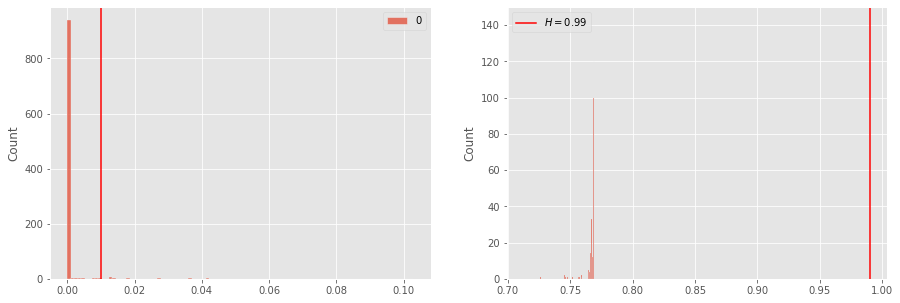

In [ ]:
# Histogrammes
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(predict[:M], ax=ax[0], bins=100);
ax[0].axvline(Hs[0], label="$H=0.01$", color="r");
sns.histplot(predict[-M:], ax=ax[1]);
ax[1].axvline(Hs[-1], label="$H=0.99$", color="r");
ax[1].set_ylim(0,150)
plt.legend();

- Nous voyons que pour les $1000$ premières prédictions (censées estimer $H=0.01$), l'estimation pourrait être bien meilleure.

- Puis, nous voyons que pour $H=0.99$, notre ANN n'arrive clairement pas à s'en rapprocher, et reste "bloqué" aux alentours de 0.76.

## 4) MBE et RMSE (ANN)

- Comme nous sommes dans un cas de régression, nous allons utiliser les mesures RMSE et MAE.

- Pour la Root Mean Squared Error (RMSE), on a : 

  - $$RMSE = \sqrt{\sum\limits_{i=1}^{N}\frac{(\hat{y}_i - y_i)^{2}}{N}}$$
  - Puise que les erreurs sont au carré, cela signifie que le RMSE accorde un plus grande importance pour les grandes erreurs. 

- Pour la Mean Bias Error (MBE), on a :

  - $$MBE = \frac{1}{N}\sum\limits_{i=1}^{N}(\hat{y}_i - y_i)$$

In [ ]:
def RMSE(y_pred,y):
  return np.sqrt(np.sum((y_pred - y)**2)/len(y_pred))

In [ ]:
# Biais et RMSE
biais = np.zeros(100)
RMSE_val = np.zeros(100)

for i in range(100):
    biais[i] = np.mean(predict[i*M:(i+1)*M] - Hs[i])
    RMSE_val[i] = RMSE(predict[i*M:(i+1)*M], Hs[i])

Text(0.5, 1.0, 'RMSE et MBE pour ANN')

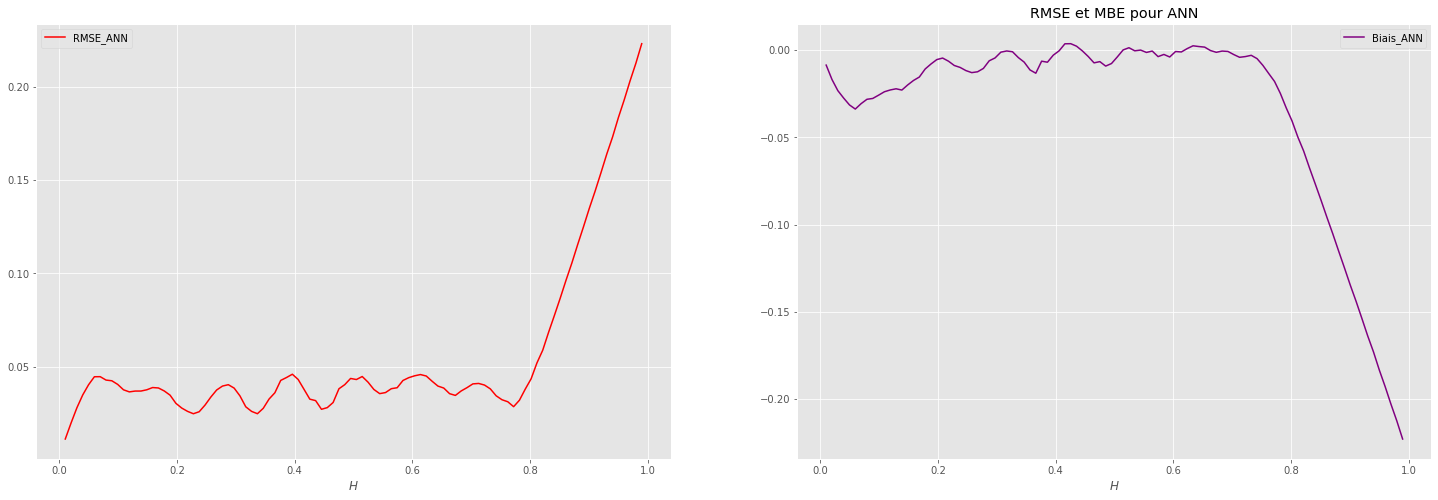

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
# ax[0].grid();ax[1].grid()
ax[0].set(xlabel=r"$H$");ax[1].set(xlabel=r"$H$")
ax[0].plot(Hs, RMSE_val, color="red", label="RMSE_ANN")
# ax[0].plot(Hs, RMSE_val_classic, color="blue", label="RMSE_classic")
ax[1].plot(Hs, biais, color="purple", label="Biais_ANN")
# ax[1].plot(Hs, biais_classic, color="aqua", label="Biais_classic")
ax[0].legend();ax[1].legend();
plt.title("RMSE et MBE pour ANN")

- Nous pouvons clairement voir que le réseau dense est un bon estimateur, au vu des faibles biais et RMSE.

- Cependant, on remarque qu'aux alentours de $H=1$, l'estimateur perd fortement en efficacité.

## 5) MAE (ANN)

- Nous allons ici utilise la Mean Absolute Error : 

$$ MAE = \frac{1}{N}\sum\limits_{i=1}^{N}\left| \hat{y}_i - y_i\right|$$ 

- La MAE ne considère pas la "direction" des erreus, à l'inverse du biais. Et toutes les erreurs ont le même poids (comme le biais).

In [ ]:
def MAE(y_pred,y):
  return np.sum(np.abs(y_pred - y))/len(y_pred)

In [ ]:
MAE_val = np.zeros(100)
for i in range(100):
    MAE_val[i] = MAE(predict[i*M:(i+1)*M], Hs[i])

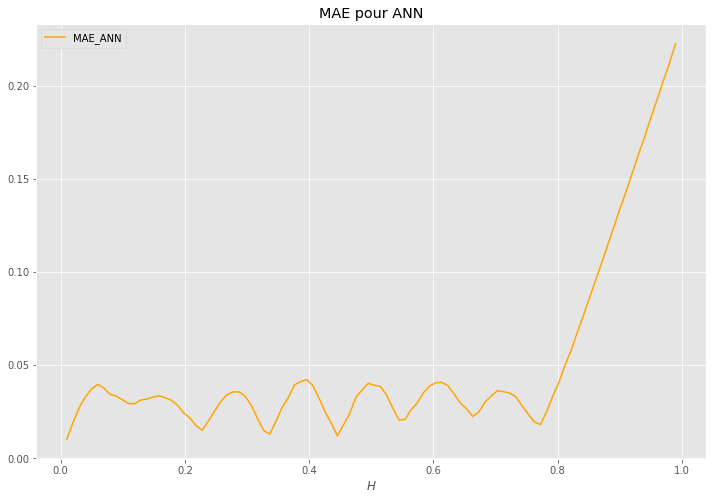

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel=r"$H$")
ax.plot(Hs, MAE_val, color="orange", label="MAE_ANN")
ax.legend()
plt.title("MAE pour ANN");

- De même que pour le bais et le RMSE, le MAE montre que l'ANN est un bon estimateur jusqu'à environ$H=0.8$.

--- 
# 2 - Réseaux convolutifs (CNN)

- Le mouvement brownien fractionnaire que nous générons est donc une série temporelle, présentant donc une dépendance temporelle (de plus si $H \ne \frac{1}{2}$ on a une longue mémoire), et est défini comme une convolution. \\
Ainsi, les CNNS semblent être plus appropriés.

## 1) Architecture du CNN de H.Stone, QF (2020)

- On note que dans son article, H.Stone a comparé son modèle avec la méthode des moments, connue pour être imprécise. 
  - Une meilleure approche serait de comparer les résultats des réseaux avec la méthode Wavelet, réputée meilleure.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPool1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import LeakyReLU

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", mode="min", patience=10) 

In [ ]:
# Initialisation
CNN = Sequential()

# kernel_size = 3
# Convolution
CNN.add(Conv1D(filters=32, kernel_size = 3, strides=1, input_shape=(100, 1), padding="valid"))
CNN.add(LeakyReLU(alpha=0.1))
# Max Pooling
CNN.add(MaxPool1D(pool_size=3, strides=1, padding='valid'))

CNN.add(Dropout(rate=0.25))

# Convolution 2
CNN.add(Conv1D(filters=64, kernel_size = 3, strides=1, padding="valid"))
CNN.add(LeakyReLU(alpha=0.1))
# Max Pooling 2
CNN.add(MaxPool1D(pool_size=3, strides=1, padding='valid'))

CNN.add(Dropout(rate=0.25))

# Convolution 3
CNN.add(Conv1D(filters=128, kernel_size = 3, strides=1, padding="valid"))
CNN.add(LeakyReLU(alpha=0.1))
# Max Pooling 3
CNN.add(MaxPool1D(pool_size=3, strides=1, padding='valid'))

CNN.add(Dropout(rate=0.4))

# Flattening
CNN.add(Flatten())

# ANN complétement connecté 
CNN.add(Dense(units=128, activation="relu"))

CNN.add(Dropout(rate=0.3))

CNN.add(Dense(units=1, activation="sigmoid"))

CNN.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error"])

CNN.fit(np.expand_dims(X_train, axis=2), Y_train, validation_split=0.2, epochs=30, batch_size=64, callbacks=[es])

Epoch 1/30
1250/1250 [==============================] - 100s 79ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 2/30
1250/1250 [==============================] - 98s 79ms/step - loss: 6.6982e-04 - mean_squared_error: 6.6982e-04 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 3/30
1250/1250 [==============================] - 98s 79ms/step - loss: 5.8606e-04 - mean_squared_error: 5.8606e-04 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 4/30
1250/1250 [==============================] - 98s 79ms/step - loss: 5.3938e-04 - mean_squared_error: 5.3938e-04 - val_loss: 0.0274 - val_mean_squared_error: 0.0274
Epoch 5/30
1250/1250 [==============================] - 98s 79ms/step - loss: 5.0767e-04 - mean_squared_error: 5.0767e-04 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 6/30
1250/1250 [==============================] - 98s 79ms/step - loss: 5.0341e-04 - mean_squared_error: 5.0341e-04 - val_loss: 0.0

In [ ]:
# On sauvegarde notre modèle
CNN.save("/content/drive/MyDrive/Colab Notebooks Centrale/Deep Learning in Finance/CNN_Hurst_model/CNN_Hurst.h5")

In [ ]:
from keras.models import load_model
CNN = load_model("/content/drive/MyDrive/Colab Notebooks Centrale/Deep Learning in Finance/CNN_Hurst_model/CNN_Hurst.h5")

In [ ]:
predict_CNN = CNN.predict(np.expand_dims(X_test, axis=2))
predict_CNN

array([[0.00098291],
       [0.00129694],
       [0.00209567],
       ...,
       [0.7954713 ],
       [0.7953717 ],
       [0.79708505]], dtype=float32)

### Histograme des premières valeurs prédites (pour $H=0.01$ et $H=0.99$)

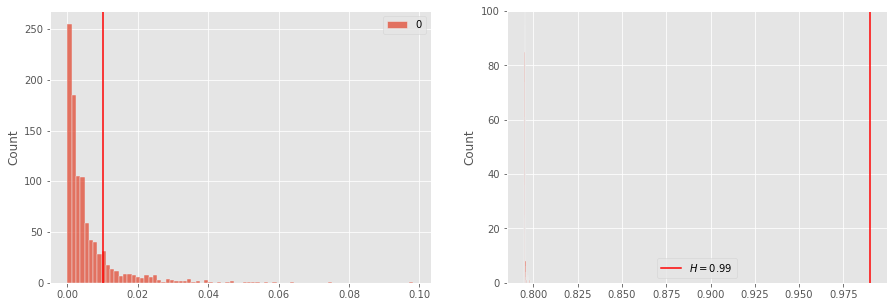

In [ ]:
# Histogrammes
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(predict_CNN[:M], ax=ax[0]);
ax[0].axvline(Hs[0], label="$H=0.01$", color="r");
sns.histplot(predict_CNN[-M:], ax=ax[1]);
ax[1].axvline(Hs[-1], label="$H=0.99$", color="r");
ax[1].set_ylim(0,100)
plt.legend()

- Nous voyons que exaxtement les mêmes caractéristiques que pour l'ANN, sauf que les predictions du CNN sont moins figées.

## 3) MBE et RMSE (CNN et ANN)

In [ ]:
# Biais et RMSE
biais_CNN = np.zeros(100)
RMSE_val_CNN = np.zeros(100)

for i in range(100):
    biais_CNN[i] = np.mean(predict_CNN[i*M:(i+1)*M] - Hs[i])
    RMSE_val_CNN[i] = RMSE(predict_CNN[i*M:(i+1)*M], Hs[i])

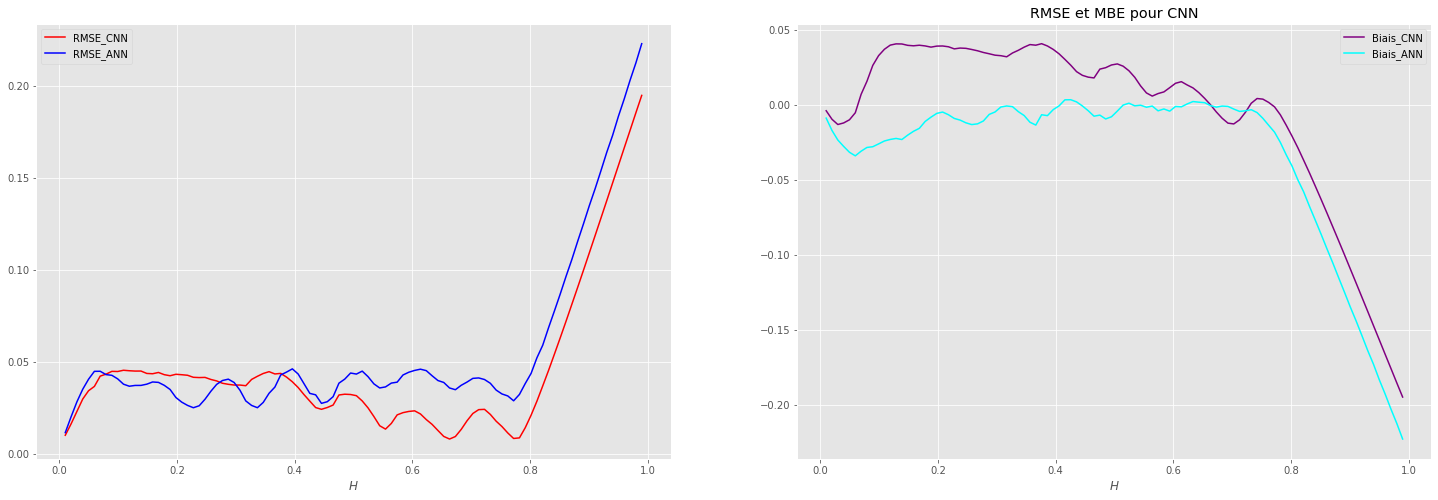

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
ax[0].set(xlabel=r"$H$");ax[1].set(xlabel=r"$H$")
ax[0].plot(Hs, RMSE_val_CNN, color="red", label="RMSE_CNN")
ax[0].plot(Hs, RMSE_val, color="blue", label="RMSE_ANN")
ax[1].plot(Hs, biais_CNN, color="purple", label="Biais_CNN")
ax[1].plot(Hs, biais, color="aqua", label="Biais_ANN")
ax[0].legend();ax[1].legend();
plt.title("RMSE et MBE pour CNN");

- D'un point de vue RMSE :
  - pour $H < 0.4$, le réseau dense est meilleur que le convolutionnel.
  - pour $H > 0.4$, c'est l'inverse. 

- En terme de biais :
  - pur $H < 0.7$ environ, le biais de l'ANN est clairment inférieur à celui du CNN.
  - Quand $H$ se rapproche de $1$, le biais du réseau dense devient plus grand que celui du $CNN$, comme dans le cas du RMSE d'ailleurs. 

- Sachant que le coefficient de Hurst pour une série financière est aux alentours de $H=0.15$, cela pousserait a privilégier l'ANN.

## 4) MAE (CNN et ANN)

In [ ]:
MAE_val_CNN = np.zeros(100)
for i in range(100):
    MAE_val_CNN[i] = MAE(predict_CNN[i*M:(i+1)*M], Hs[i])

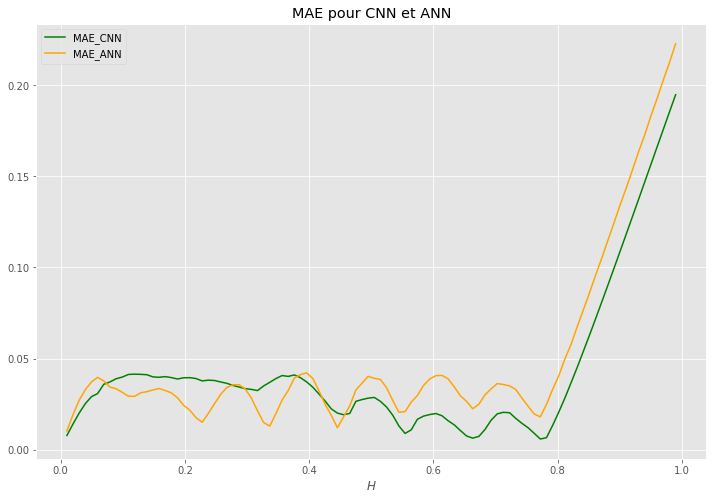

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set(xlabel=r"$H$")
ax.plot(Hs, MAE_val_CNN, color="green", label="MAE_CNN")
ax.plot(Hs, MAE_val, color="orange", label="MAE_ANN")
ax.legend()
plt.title("MAE pour CNN et ANN");

- Nous observons les mêmes choses que pour le RMSE, mis à part le fait que l'ANN devient moins bon pour un $H$ légèrement supérieur à $0.4$.

# 5) Comparer l'ANN et le CNN 

- Au vu des trois mesures de risques présentées dans cette partie et la précédente pour les deux réseaux, l'avis est forcément mitigé. Cependant on peut dire que pour des $H < 0.5$ le réseau dense est meilleur que le CNN de H.Stone, et en se basant sur les recherches récentes effectuées ($H \sim 0.15$ pour les séries financières), nous pouvons dire que l'ANN est à privilégier.

- En plus de ca, il est clairement moins couteux en temps de calcul.

- On pourrait également se demander pourquoi les deux estimateurs peinent à estimer $H$ lorsque celui-ci tend vers $1$ et restent "figés" vers $0.8$.
  - On plot deux mouvements browniens fractionnaires, pour $H=0.01$ et pour $H=0.99$.

/usr/local/lib/python3.6/dist-packages/fbm/fbm.py:172: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  "Combination of increments n and Hurst value H "


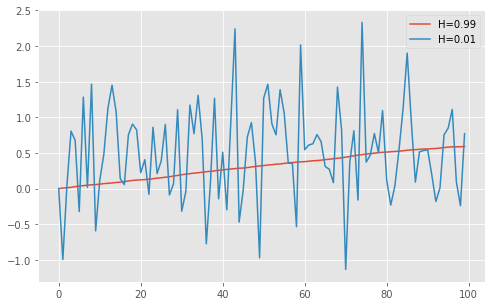

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(fbm(99, 0.99, length=1), label="H=0.99")
plt.plot(fbm(99, 0.01, length=1), label="H=0.01")
plt.legend();

- On voit donc que plus $H$ est proche de $1$ et plus le mouvement est lisse. En fait si $H=1$ le mouvement est ballistique, ce qui n'est pas du tout intéressant pour la volatilité.

- Peut être que le réseau n'arrive pas à détecter de features intrinsèques au processus vu à quel point il est lisse,
  - c'est à dire que les fBM avec un $H$ proche de $1$ vont être difficilement différenciables, 
  - alors que ceux avec plus de fluctuations le seront bien plus, intuitivement.

---
# 3 - Wavelets

- Ici nous allons essayer d'estimer l'exposant de Hurst avec la méthode Wavelets
  - Pour ca il faut utiliser le package de R "liftLRD". 
  - Nous allons donc utilser R depuis Python
  - Puis nous comparerons les résutats obtenus
  - Cela permettra de situer les réseaux de neurones vis à vis du meilleur estimateur "classique"

### Importation de la fonction depuis R

In [ ]:
%%capture
from rpy2.robjects.packages import importr
utils = importr("utils")
utils.install_packages("liftLRD")

# conversion numpy <-> objets R
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

# charger la bibliothèque
liftLRD = importr("liftLRD")

### Application

- La fonction lift.Hurst excutée dans Google Colab faisait exploser la RAM de la session. Nous avons donc choisi de la faire tourner en local, puis d'exporter le résultat en fichier csv.

- Le temps de calcul étant relativement long, on se limite à M = 100 (4h30 de calcul)

# 1) Implémentation

In [ ]:
# Choisir la valeur de M qui correspond à M_test 
M = 100
H_waves = np.zeros((100,M))


for i in tqdm(range(100), desc=" H "):
  X_h = X_test[i*M:(i+1)*M,:] 
  #print('Valeur de H',i)
  # Pour une valeur de H donnée 
  for j in  tqdm(range(M), desc="M"):
    #print('Pour H =',i,'serie temp',j)
    # Pour une série temporelle donnée
    H_waves[i,j] = liftLRD.liftHurst(np.diff(X_h[j,:]))[1]

In [ ]:
# Calcul du biais, RMSE et MAE

MAE_val_waves = np.zeros(100)
biais_val_waves = np.zeros(100)
RMSE_val_waves = np.zeros(100)


for i in range(100):
    MAE_val_waves[i] = MAE(H_waves[i*M:(i+1)*M], Hs[i])
    biais_val_waves[i] = np.mean(H_waves[i*M:(i+1)*M] - Hs[i])
    RMSE_val_waves[i] = RMSE(H_waves[i*M:(i+1)*M], Hs[i])


# 2) Biais 

In [ ]:
# Affichage du biais 

plt.plot(Hs,biais_val_waves,label='Biais_Waves',color='c')
plt.xlabel('H')
plt.ylabel('biais')
plt.legend()
plt.show()

## 3) MAE

In [ ]:
# Affichage du MAE

plt.plot(Hs,MAE_val_waves,label='MAE_Waves',color='m')
plt.xlabel('H')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
# Affichage du RMSE

plt.plot(Hs,RMSE_val_waves,label='RMSE_Waves',color='y')
plt.xlabel('H')
plt.ylabel('RMSE')
plt.legend()
plt.show()

- A faire : refaire tourner sur Colab afin de montrer que les Neural Networks sont mieux